# AFAME TECHNOLOGIES: TITANIC SURVIVAL PREDICTION

## Importing Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

## Dataset: TITANIC SURVIVAL PREDICTION

In [2]:
data=pd.read_csv("Titanic-Dataset.csv")

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Categorical Columns - [Survived, PClass, Sex, SibSp, Parch, Embarked]

### Numerical Columns - [Age, Fare, Passengerid]

### Mixed Columns - [Name, Ticket, Cabin]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.shape

(891, 12)

In [6]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Data Visualization

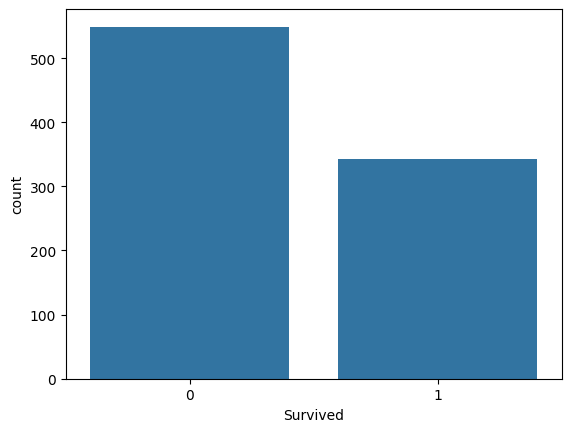

In [7]:
sns.countplot(data=data, x='Survived')
death_percent=round((data['Survived'].value_counts().values[0]/891)*100)

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<AxesSubplot: xlabel='Pclass', ylabel='count'>

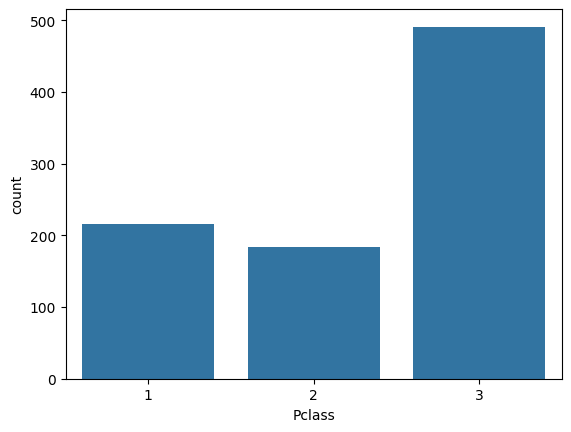

In [8]:
print((data['Pclass'].value_counts()/891)*100)
sns.countplot(data=data, x='Pclass')

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<AxesSubplot: xlabel='Sex', ylabel='count'>

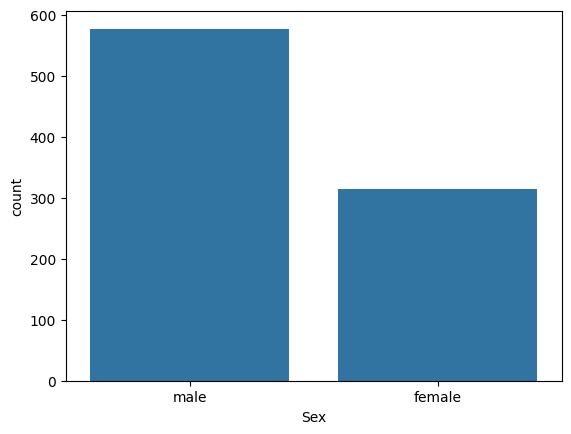

In [9]:
print((data['Sex'].value_counts()/891)*100)
sns.countplot(data=data, x='Sex')

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<AxesSubplot: xlabel='SibSp', ylabel='count'>

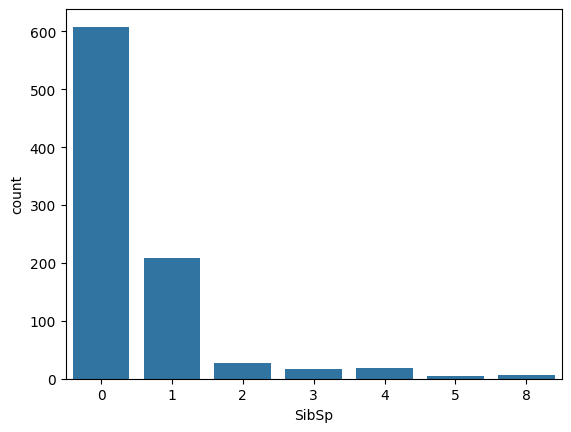

In [10]:
print(data['SibSp'].value_counts())
sns.countplot(data = data, x='SibSp')

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<AxesSubplot: xlabel='Parch', ylabel='count'>

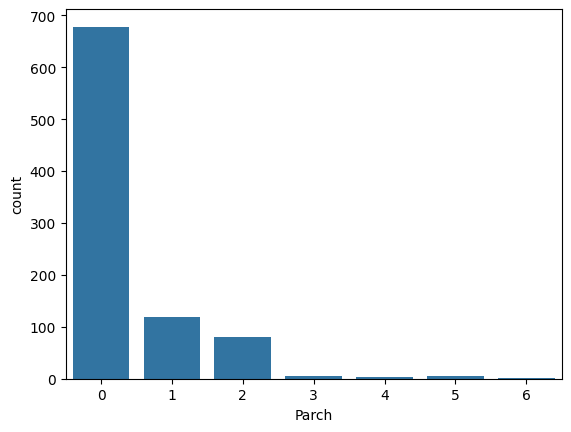

In [11]:
print((data['Parch'].value_counts()/891)*100)
sns.countplot(data=data, x='Parch')

Embarked
S    72.278339
C    18.855219
Q     8.641975
Name: count, dtype: float64


<AxesSubplot: xlabel='Embarked', ylabel='count'>

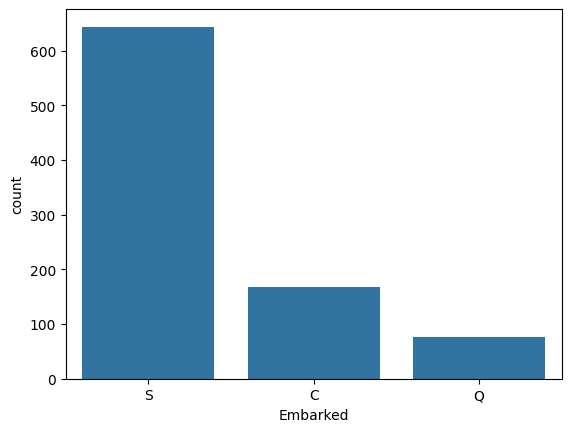

In [12]:
print((data['Embarked'].value_counts()/891)*100)
sns.countplot(data=data, x='Embarked')

/tmp/ipykernel_167/1333658756.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])
0.38910778230082704
0.17827415364210353


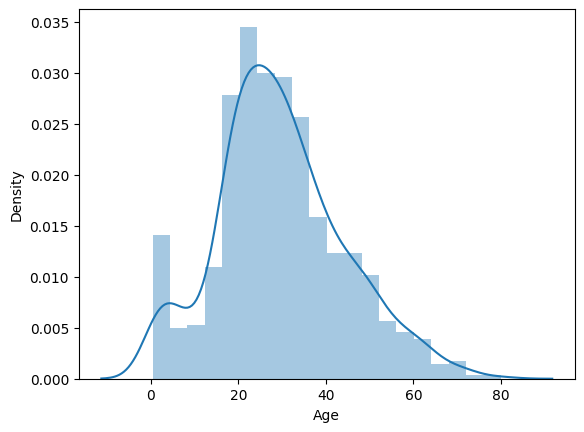

In [13]:
sns.distplot(data['Age'])
print(data['Age'].skew())
print(data['Age'].kurt())

<AxesSubplot: xlabel='Age'>

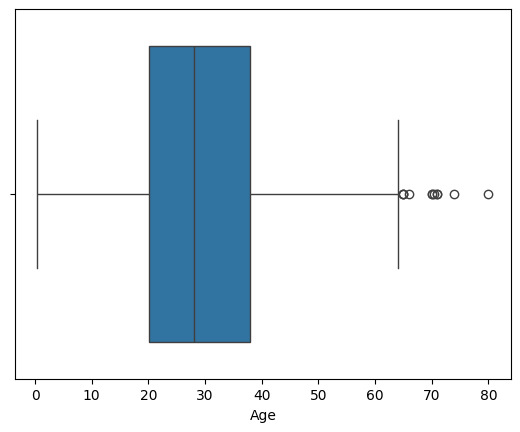

In [14]:
sns.boxplot(data, x ='Age')

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


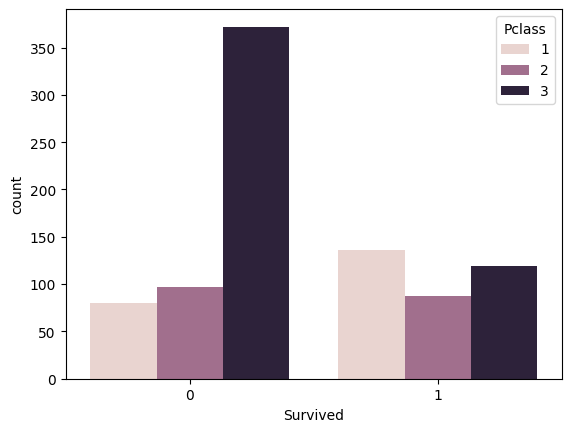

In [16]:
sns.countplot(data, x='Survived', hue='Pclass')
pd.crosstab(data['Pclass'], data['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


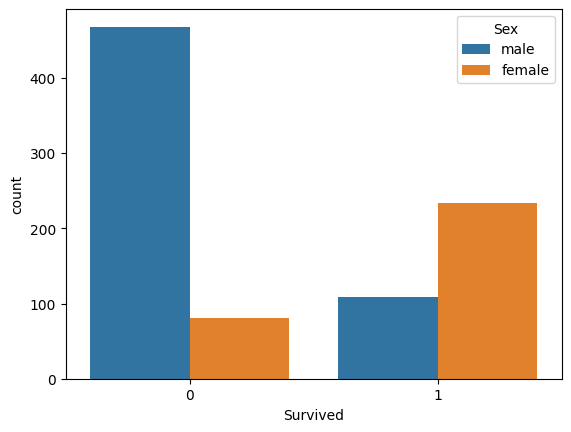

In [17]:
sns.countplot(data, x='Survived', hue='Sex')
pd.crosstab(data['Sex'], data['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.3,33.7


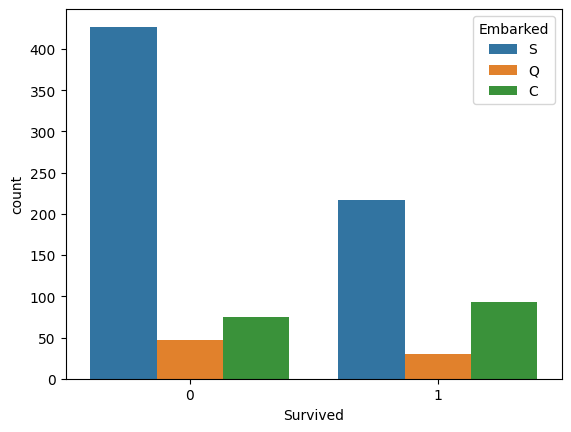

In [18]:
sns.countplot(data, x='Survived', hue='Embarked')

pd.crosstab(data['Embarked'], data['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

/tmp/ipykernel_167/2170415421.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Survived']==0]['Age'])
/tmp/ipykernel_167/2170415421.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Survived']==1]['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

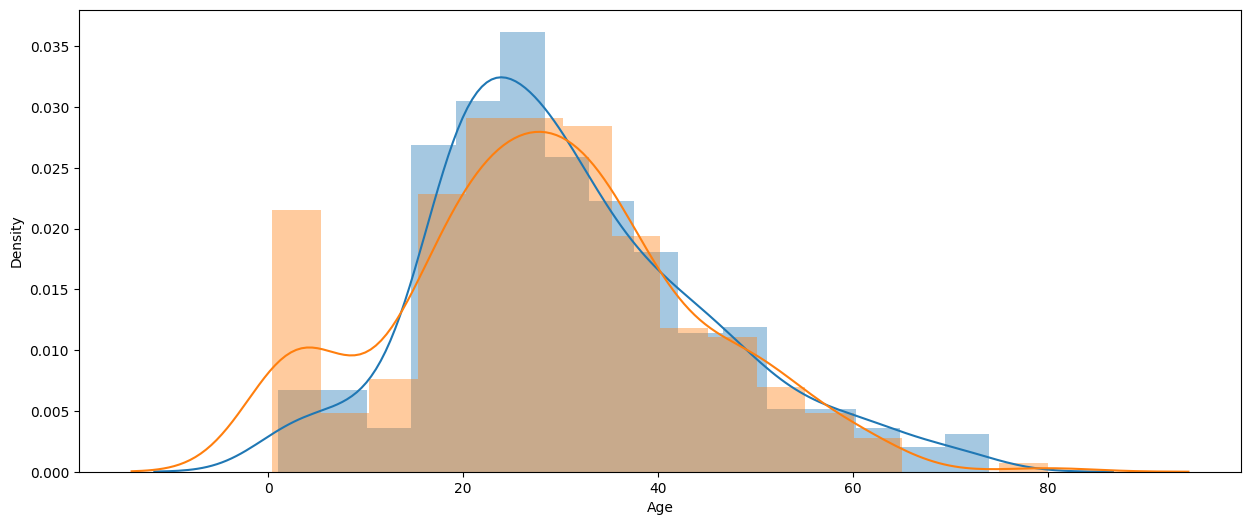

In [19]:
plt.figure(figsize=(15,6))
sns.distplot(data[data['Survived']==0]['Age'])
sns.distplot(data[data['Survived']==1]['Age'])

/tmp/ipykernel_167/1402514286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Survived']==0]['Fare'])
/tmp/ipykernel_167/1402514286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Survived']==1]['Fare'])


<AxesSubplot: xlabel='Fare', ylabel='Density'>

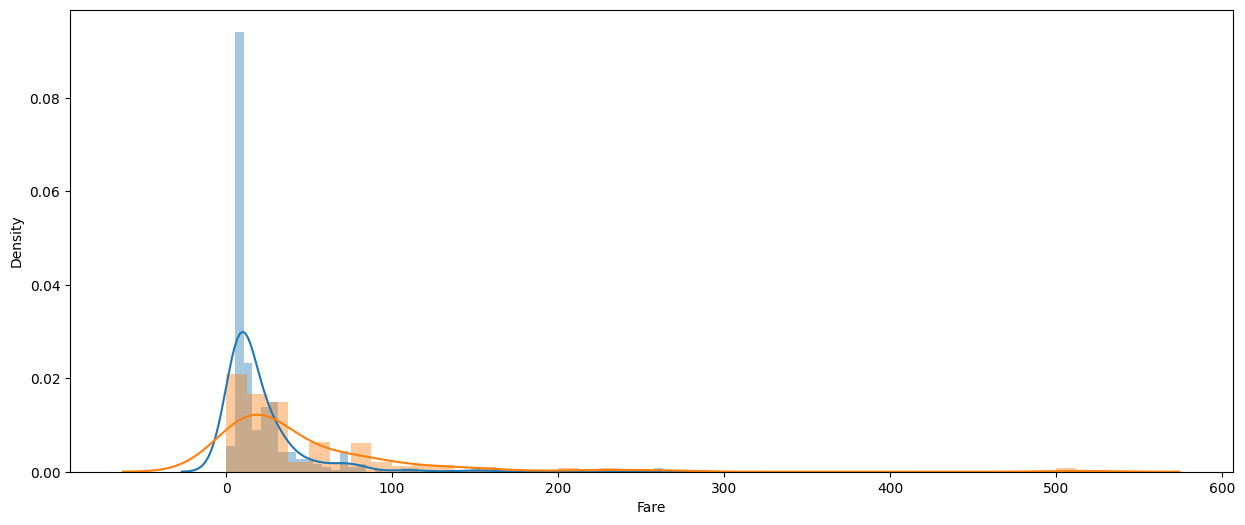

In [20]:
plt.figure(figsize=(15,6))
sns.distplot(data[data['Survived']==0]['Fare'])
sns.distplot(data[data['Survived']==1]['Fare'])

In [21]:
from sklearn import preprocessing as pp

In [22]:
data['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [23]:
data_scaler=pp.MinMaxScaler(feature_range=(0,1))
fare_arr=data[['Fare']]
fare_arr

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [24]:
fare_scaled=data_scaler.fit_transform(fare_arr)

In [25]:
fare_scaled

array([[0.01415106],
       [0.13913574],
       [0.01546857],
       [0.1036443 ],
       [0.01571255],
       [0.0165095 ],
       [0.10122886],
       [0.04113566],
       [0.02173075],
       [0.05869429],
       [0.03259623],
       [0.05182215],
       [0.01571255],
       [0.06104473],
       [0.01533038],
       [0.03122992],
       [0.05684821],
       [0.02537431],
       [0.03513366],
       [0.01410226],
       [0.05074862],
       [0.02537431],
       [0.01567195],
       [0.06929139],
       [0.04113566],
       [0.06126432],
       [0.01410226],
       [0.51334181],
       [0.01537917],
       [0.01541158],
       [0.0541074 ],
       [0.28598956],
       [0.01512699],
       [0.02049464],
       [0.16038672],
       [0.10149724],
       [0.01411046],
       [0.01571255],
       [0.03513366],
       [0.02194234],
       [0.01849397],
       [0.04098927],
       [0.01541158],
       [0.08115719],
       [0.01537917],
       [0.01571255],
       [0.03025399],
       [0.015

In [26]:
data['fare_scaled']=fare_scaled
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  fare_scaled  891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [27]:
col_to_drop=['Name','Cabin']
data=data.drop(col_to_drop,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  fare_scaled  891 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 76.7+ KB


In [28]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Embarked     712 non-null    object 
 10  fare_scaled  712 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 66.8+ KB


In [29]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 6.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
print(data['Sex'].unique())

[1 0]


In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])
print(data['Embarked'].unique()) 

[2 0 1]


In [33]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,fare_scaled
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2,0.014151
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0,0.139136
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2,0.015469
3,4,1,1,0,35.0,1,0,113803,53.1000,2,0.103644
4,5,0,3,1,35.0,0,0,373450,8.0500,2,0.015713


In [34]:
x=data.drop(['Survived','Ticket','Fare','PassengerId'],axis=1)
y=data['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((569, 7), (143, 7))

In [35]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,fare_scaled
0,3,1,22.0,1,0,2,0.014151
1,1,0,38.0,1,0,0,0.139136
2,3,0,26.0,0,0,2,0.015469
3,1,0,35.0,1,0,2,0.103644
4,3,1,35.0,0,0,2,0.015713


## ML Model Learning

In [36]:
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'BN': GaussianNB(),
    'RBF': RandomForestClassifier(),
    'DT': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = (2*tp)/(2*tp + fp + fn)
    precision = tp/(tp+fp)

    results[name] = {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity, #recall
        'Specificity': specificity,
        'F1 Score': f1,
        'Precision': precision,
        
    }

# Print the results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Sensitivity: {result['Sensitivity']}")
    print(f"Specificity: {result['Specificity']}")
    print(f"F1 Score: {result['F1 Score']}")
    print()


Model: KNN
Accuracy: 0.7412587412587412
Precision: 0.75
Sensitivity: 0.5901639344262295
Specificity: 0.8536585365853658
F1 Score: 0.6605504587155964

Model: SVM
Accuracy: 0.6083916083916084
Precision: 0.7777777777777778
Sensitivity: 0.11475409836065574
Specificity: 0.975609756097561
F1 Score: 0.2

Model: BN
Accuracy: 0.7482517482517482
Precision: 0.7450980392156863
Sensitivity: 0.6229508196721312
Specificity: 0.8414634146341463
F1 Score: 0.6785714285714286

Model: RBF
Accuracy: 0.7762237762237763
Precision: 0.7301587301587301
Sensitivity: 0.7540983606557377
Specificity: 0.7926829268292683
F1 Score: 0.7419354838709677

Model: DT
Accuracy: 0.7692307692307693
Precision: 0.7
Sensitivity: 0.8032786885245902
Specificity: 0.7439024390243902
F1 Score: 0.7480916030534351

Model: XGBoost
Accuracy: 0.8041958041958042
Precision: 0.7704918032786885
Sensitivity: 0.7704918032786885
Specificity: 0.8292682926829268
F1 Score: 0.7704918032786885



In [37]:
!pip install lightgbm==4.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 74.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [38]:
!pip install catboost==1.2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 11.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

models = {
    'ET': ExtraTreesClassifier(),  
    'LIGHTGBM': LGBMClassifier(),  
    'RC': RidgeClassifier(),       
     'LR': LogisticRegression(),
    'gb': GradientBoostingClassifier(),
    'catboost': CatBoostClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = (2*tp)/(2*tp + fp + fn)
    precision = tp/(tp+fp)

    results[name] = {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'F1 Score': f1,
        'Precision': precision,

    }
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Sensitivity: {result['Sensitivity']}")
    print(f"Specificity: {result['Specificity']}")
    print(f"F1 Score: {result['F1 Score']}")
    
    print()


43:	learn: 0.5328831	total: 63.9ms	remaining: 1.39s
44:	learn: 0.5309930	total: 64.1ms	remaining: 1.36s
45:	learn: 0.5284940	total: 64.6ms	remaining: 1.34s
46:	learn: 0.5266754	total: 64.9ms	remaining: 1.31s
47:	learn: 0.5250348	total: 65.1ms	remaining: 1.29s
48:	learn: 0.5229713	total: 65.6ms	remaining: 1.27s
49:	learn: 0.5210659	total: 66ms	remaining: 1.25s
50:	learn: 0.5185612	total: 66.5ms	remaining: 1.24s
51:	learn: 0.5160697	total: 66.9ms	remaining: 1.22s
52:	learn: 0.5137796	total: 67.3ms	remaining: 1.2s
53:	learn: 0.5118060	total: 67.8ms	remaining: 1.19s
54:	learn: 0.5096194	total: 68.2ms	remaining: 1.17s
55:	learn: 0.5079247	total: 68.5ms	remaining: 1.15s
56:	learn: 0.5061396	total: 68.8ms	remaining: 1.14s
57:	learn: 0.5040817	total: 69.3ms	remaining: 1.12s
58:	learn: 0.5018588	total: 69.7ms	remaining: 1.11s
59:	learn: 0.5002951	total: 70.2ms	remaining: 1.1s
60:	learn: 0.4989168	total: 70.6ms	remaining: 1.09s
61:	learn: 0.4973072	total: 71ms	remaining: 1.07s
62:	learn: 0.49653

### Among different ML algorithms, "GradientBoostingClassifier" outperforms with the highest accuracy.

In [40]:
new_passenger = [[0,0,43.0,1,0,1,0.103644]]
model=KNeighborsClassifier()
model.fit(X_train,y_train)
model.predict(X_test)
prediction = model.predict(new_passenger)
print("Survived Prediction:", prediction[0])

Survived Prediction: 1
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e609df1f-223d-416f-99f9-d472a510f9e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>